본 문서는 https://datascienceschool.net/view-notebook/fcd3550f11ac4537acec8d18136f2066/ 을 참고했음을 밝힙니다

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, fbeta_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")
import surprise

# 추천 시스템

#### 추천시스템은 사용자 아이디와, 상품 아이디라는 두개의 카테고리 입력과 평점 출력을 가지는 입력시스템이다.

#### 1. Data : 데이터 업로드 MovieLense의 영화 추천데이터의 샘플평점

In [7]:
data = surprise.Dataset.load_builtin('ml-100k')

In [8]:
df = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rate", "id"])
del df["id"]
df.head()

,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [9]:
df_table = df.set_index(["user", "item"]).unstack()

In [10]:
df_table.fillna("").iloc[212:222, 808:817]

rate                                
item  211 212 213 214 215 216 217 218 219
user                                     
290     3                   4       2    
291         4       4   4           4   4
292                 3                    
293     4       3       4   4   3   2    
294                                      
295             5       5   5   4   5    
296     4                                
297     4       3       2   4       3    
298     5       3       5                
299     4   4   5           5

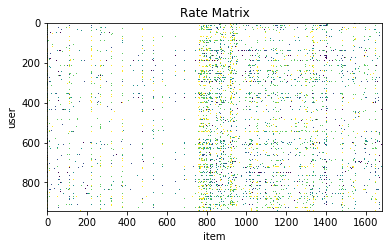

In [11]:
plt.imshow(df_table)
plt.grid(False)
plt.xlabel("item")
plt.ylabel("user")
plt.title("Rate Matrix")
plt.show()

In [12]:
data.split(n_folds=3)

bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = surprise.BaselineOnly(bsl_options=bsl_options)

np.random.seed(0)
acc = np.zeros(3)
for i, (trainset, testset) in enumerate(data.folds()):
    algo.train(trainset)
    predictions = algo.test(testset)
    acc[i] = surprise.accuracy.rmse(predictions, verbose=True)
acc.mean()

Estimating biases using als...
RMSE: 0.9472
Estimating biases using als...
RMSE: 0.9431
Estimating biases using als...
RMSE: 0.9410


0.9437583591988007

In [13]:
surprise.evaluate(algo, data)

Evaluating RMSE, MAE of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using als...
RMSE: 0.9472
MAE:  0.7503
------------
Fold 2
Estimating biases using als...
RMSE: 0.9431
MAE:  0.7486
------------
Fold 3
Estimating biases using als...
RMSE: 0.9410
MAE:  0.7448
------------
------------
Mean RMSE: 0.9438
Mean MAE : 0.7479
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.7502608105908751,
                             0.7485547972195365,
                             0.7448063493050545],
                            'rmse': [0.9472232445320704,
                             0.9430548893791574,
                             0.9409969436851743]})

In [14]:
sim_options = {'name': 'msd'}
algo = surprise.KNNBasic(sim_options=sim_options)
surprise.evaluate(algo, data)

Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9930
MAE:  0.7852
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9839
MAE:  0.7800
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9826
MAE:  0.7751
------------
------------
Mean RMSE: 0.9865
Mean MAE : 0.7801
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.7852036766534195,
                             0.7799564582586708,
                             0.7751397481372814],
                            'rmse': [0.9929708555046356,
                             0.9839087259044816,
                             0.9825530185764658]})

In [15]:
sim_options = {'name': 'cosine'}
algo = surprise.KNNBasic(sim_options=sim_options)
surprise.evaluate(algo, data)

Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0250
MAE:  0.8118
------------
Fold 2
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0174
MAE:  0.8083
------------
Fold 3
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0160
MAE:  0.8030
------------
------------
Mean RMSE: 1.0195
Mean MAE : 0.8077
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.8117562141946375,
                             0.8082703969695442,
                             0.8030183336765303],
                            'rmse': [1.0250010850782607,
                             1.0174009390581154,
                             1.0160463527183163]})

In [16]:
sim_options = {'name': 'pearson'}
algo = surprise.KNNBasic(sim_options=sim_options)
surprise.evaluate(algo, data)

Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0262
MAE:  0.8144
------------
Fold 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0158
MAE:  0.8089
------------
Fold 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0122
MAE:  0.8018
------------
------------
Mean RMSE: 1.0181
Mean MAE : 0.8083
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.8144029196267444,
                             0.8088579477527919,
                             0.8017532994853238],
                            'rmse': [1.026185658789098,
                             1.015783998243737,
                             1.012196653904734]})

In [17]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNWithMeans(sim_options=sim_options)
surprise.evaluate(algo, data)

Evaluating RMSE, MAE of algorithm KNNWithMeans.

------------
Fold 1
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9511
MAE:  0.7419
------------
Fold 2
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9489
MAE:  0.7412
------------
Fold 3
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9435
MAE:  0.7338
------------
------------
Mean RMSE: 0.9478
Mean MAE : 0.7390
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.7419404754168082,
                             0.7412240753500826,
                             0.7338471096976757],
                            'rmse': [0.9511130342263584,
                             0.9488662439077592,
                             0.9434924821144789]})

In [18]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNBaseline(sim_options=sim_options)
surprise.evaluate(algo, data)

Evaluating RMSE, MAE of algorithm KNNBaseline.

------------
Fold 1
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9368
MAE:  0.7349
------------
Fold 2
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9307
MAE:  0.7306
------------
Fold 3
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9283
MAE:  0.7250
------------
------------
Mean RMSE: 0.9319
Mean MAE : 0.7302
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.734930330860689,
                             0.7306017120456529,
                             0.7250098770582767],
                            'rmse': [0.9368017545069817,
                             0.9307052297481168,
                             0.9282853404719293]})

# Latent 모형

In [19]:
algo = surprise.SVD(n_factors=200, n_epochs=30)
surprise.evaluate(algo, data)

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.9569
MAE:  0.7543
------------
Fold 2
RMSE: 0.9527
MAE:  0.7519
------------
Fold 3
RMSE: 0.9505
MAE:  0.7484
------------
------------
Mean RMSE: 0.9534
Mean MAE : 0.7515
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.7543086496529079,
                             0.7518582630180303,
                             0.7483725102746579],
                            'rmse': [0.9569359879463599,
                             0.9526751054895679,
                             0.9504941965307113]})

## 7.5(목) Service System Lab 세미나

#### Topic Temporal Diversity

